<a href="https://colab.research.google.com/github/JensWehner/Quantennachmittage/blob/main/Quantennachmittage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dimod
!pip install dwave-tabu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.9 MB 14.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 700 kB 15.2 MB/s 


In [ ]:
import dimod

## Hallo, willkommen zu Quantencomputing mit der deutschen Bahn

Heute: QUBOs und (Quanten)Annealing






































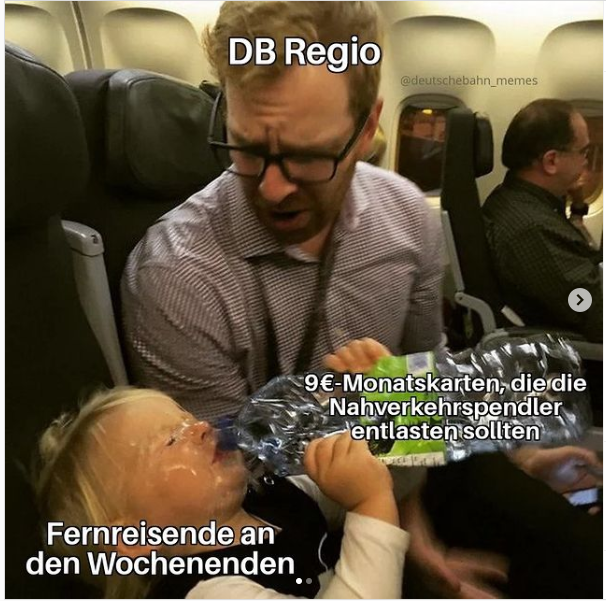

**Ein Beispiel**


Ich habe eine Fabrik. Ich kann Eisen, Brot, Torte und Aluminium produzieren in einer Halle aber sollte ich?

Eisen bringt 50Euro, Brot 30Euro, Torte 40 Euro und Aluminium 45 Euro

Eisen und Brot zusammen ist nicht cool, wegen der Verschmutzung dadurch muss ich dann 40 Euro Strafe zahlen. Bei Eisen und Torte auch. Brot und Torte zusammen ist super und gibt mir einen 10 Euro Bonus, weil aehnliche Zutaten. Aluminium und Eisen bringen zusammen 20 Euro mehr und Aluminium ist auch gut fuer Tortenverpackung und das bringt mir nen 5 Euro Bonus. 

Was sollte ich produzieren um maximal Geld zu verdienen? 15 min Zeit

In [ ]:
import numpy as np

In [ ]:
# Eisen, Brot, Torte, Aluminium
b = np.array([50,30,40,45])
C=np.array([[0,-40,-40,20],[-40,0,10,0],[-40,10,0,5],[20,0,5,0]])

\begin{align}\mathcal{H}=\mathbf{a}^T\mathbf{C}\mathbf{a} + \mathbf{b}^T\mathbf{a}\end{align}

---




**Q**uadratic **U**nconstrained **B**inary **O**ptimization


\begin{align}\mathcal{H}=\sum_{i<j} C_{ij}a_i a_j + \sum_{i} b_i a_i \text{ mit } \forall a_i \in {0,1} \text{ und } C_{ij} \in \mathbb{R},b_i \in \mathbb{R} \end{align}

In [ ]:
bqm=dimod.BinaryQuadraticModel(-b,-C,dimod.BINARY)
bqm.relabel_variables({0:"Eisen",1:"Brot",2:"Torte",3:"Aluminium"})
solver = dimod.ExactSolver()
solutions = solver.sample(bqm)

   Aluminium Brot Eisen Torte energy num_oc.
11         1    1     0     1 -145.0       1
14         1    0     1     0 -135.0       1
9          1    0     1     1 -105.0       1
8          1    0     0     1  -95.0       1
4          0    1     0     1  -90.0       1
13         1    1     1     0  -85.0       1
10         1    1     1     1  -75.0       1
12         1    1     0     0  -75.0       1
1          0    0     1     0  -50.0       1
15         1    0     0     0  -45.0       1
7          0    0     0     1  -40.0       1
3          0    1     0     0  -30.0       1
6          0    0     1     1  -10.0       1
0          0    0     0     0    0.0       1
2          0    1     1     0    0.0       1
5          0    1     1     1   20.0       1
['BINARY', 16 rows, 16 samples, 4 variables]


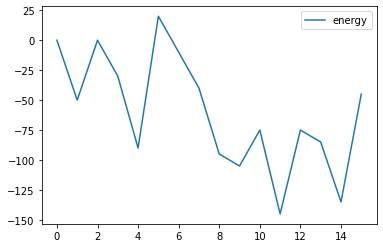

In [ ]:
print(solutions)

energies =solutions.to_pandas_dataframe()
energies.plot(y="energy")

   Aluminium Brot Eisen Torte energy num_oc.
11         1    1     0     1 -145.0       1
14         1    0     1     0 -135.0       1
9          1    0     1     1 -105.0       1
8          1    0     0     1  -95.0       1
4          0    1     0     1  -90.0       1
13         1    1     1     0  -85.0       1
10         1    1     1     1  -75.0       1
12         1    1     0     0  -75.0       1
1          0    0     1     0  -50.0       1
15         1    0     0     0  -45.0       1
7          0    0     0     1  -40.0       1
3          0    1     0     0  -30.0       1
6          0    0     1     1  -10.0       1
0          0    0     0     0    0.0       1
2          0    1     1     0    0.0       1
5          0    1     1     1   20.0       1
['BINARY', 16 rows, 16 samples, 4 variables]


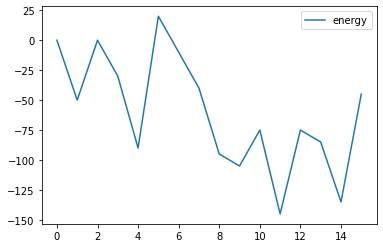

In [ ]:
bqm=dimod.BinaryQuadraticModel(-b,-C,dimod.BINARY)
bqm.relabel_variables({0:"Eisen",1:"Brot",2:"Torte",3:"Aluminium"})
solver = dimod.ExactSolver()
solutions = solver.sample(bqm)
print(solutions)

energies =solutions.to_pandas_dataframe()
energies.plot(y="energy")

## Zwangsbedingungen

Gleiches Beispiel, aber wir müssen genau 2 Sachen gleichzeitig produzieren. 


$\sum_i a_i -2 = 0$


Wie kann man Lösungen die diese Bedingung verletzen bestrafen.


Penalty term $P= W \cdot(\sum_i a_i -2)^2$

BinaryQuadraticModel({'Eisen': -350.0, 'Brot': -330.0, 'Torte': -340.0, 'Aluminium': -345.0}, {('Brot', 'Eisen'): 280.0, ('Torte', 'Eisen'): 280.0, ('Torte', 'Brot'): 180.0, ('Aluminium', 'Eisen'): 160.0, ('Aluminium', 'Brot'): 200.0, ('Aluminium', 'Torte'): 190.0}, 400.0, 'BINARY')
   Aluminium Brot Eisen Torte energy num_oc.
14         1    0     1     0 -135.0       1
8          1    0     0     1  -95.0       1
4          0    1     0     1  -90.0       1
12         1    1     0     0  -75.0       1
11         1    1     0     1  -45.0       1
6          0    0     1     1  -10.0       1
9          1    0     1     1   -5.0       1
2          0    1     1     0    0.0       1
13         1    1     1     0   15.0       1
1          0    0     1     0   50.0       1
15         1    0     0     0   55.0       1
7          0    0     0     1   60.0       1
3          0    1     0     0   70.0       1
5          0    1     1     1  120.0       1
10         1    1     1     1  325.0     

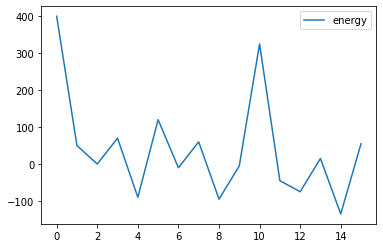

In [ ]:
bqm=dimod.BinaryQuadraticModel(-b,-C,dimod.BINARY)
bqm.relabel_variables({0:"Eisen",1:"Brot",2:"Torte",3:"Aluminium"})
W= 100
bqm.add_linear_equality_constraint([("Eisen",1),("Brot",1),("Torte",1),("Aluminium",1)],W,-2)
print(bqm)

solver = dimod.ExactSolver()
solutions = solver.sample(bqm)
print(solutions)

energies =solutions.to_pandas_dataframe()
energies.plot(y="energy")

# Nun zu unserem deutschen Bahn Problem:

Wieviele ICEs hat die deutsche Bahn?
Wieviele Züge gibt es im Fahrplan (nur Fernverkehr)?
Wieviele Züge gibt es im Fahrplan (Regio)?

5 min Recherche


Link zu unsererm Paper:
https://arxiv.org/abs/2109.07212v1


## Der "ExactSolver" wird sehr langsam bei mehr als 18 variablen.

Jede Variable verdoppelt die Anzahl der möglichen Lösungen $L$. 

$L = 2^N$ 


In [ ]:
sampler = dimod.SimulatedAnnealingSampler()
approx_solution = sampler.sample(bqm,num_sweeps= 2, num_reads=4)



In [ ]:
print(approx_solution)

  Aluminium Brot Eisen Torte energy num_oc.
1         1    0     0     1  -95.0       1
2         1    0     0     1  -95.0       1
3         1    0     0     1  -95.0       1
0         1    1     0     0  -75.0       1
['BINARY', 4 rows, 4 samples, 4 variables]


simulated_anealing.svg

## Quantum Annealing

qunatum_tunneling.svgadiabatic_evolution.svg

## **Q**uadratic **U**nconstrained **B**inary **O**ptimization


\begin{align}\mathcal{H}=\sum_{i<j} C_{ij}a_i a_j + \sum_{i} b_i a_i \end{align}

$${\cal H}_{ising} = \underbrace{- \frac{A({s})}{2} \left(\sum_i {\hat\sigma_{x}^{(i)}}\right)}_\text{Initial Hamiltonian} + \underbrace{\frac{B({s})}{2} \left(\sum_{i} h_i {\hat\sigma_{z}^{(i)}} + \sum_{i>j} J_{i,j} {\hat\sigma_{z}^{(i)}} {\hat\sigma_{z}^{(j)}}\right)}_\text{Final Hamiltonian}$$

In [48]:
!pip install dwave.system

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 7.7 MB/s 
     |████████████████████████████████| 97 kB 8.2 MB/s 
     |████████████████████████████████| 966 kB 87.8 MB/s 
     |████████████████████████████████| 108 kB 87.4 MB/s 
     |████████████████████████████████| 5.3 MB 33.3 MB/s 
     |████████████████████████████████| 44 kB 3.8 MB/s 
     |████████████████████████████████| 246 kB 97.3 MB/s 


In [49]:
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
sampleset = sampler.sample(bqm, num_reads=1000)

ValueError: ignored

https://docs.ocean.dwavesys.com/en/stable/overview/sapi.html#sapi-access